In [10]:
from boxoffice.db.frames import get_movie_frame_full
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = get_movie_frame_full()

movies.csv exists, 1729873824.6053426, 1729873814.226595
Reading from movies.csv


Text(0, 0.5, 'Number of movies')

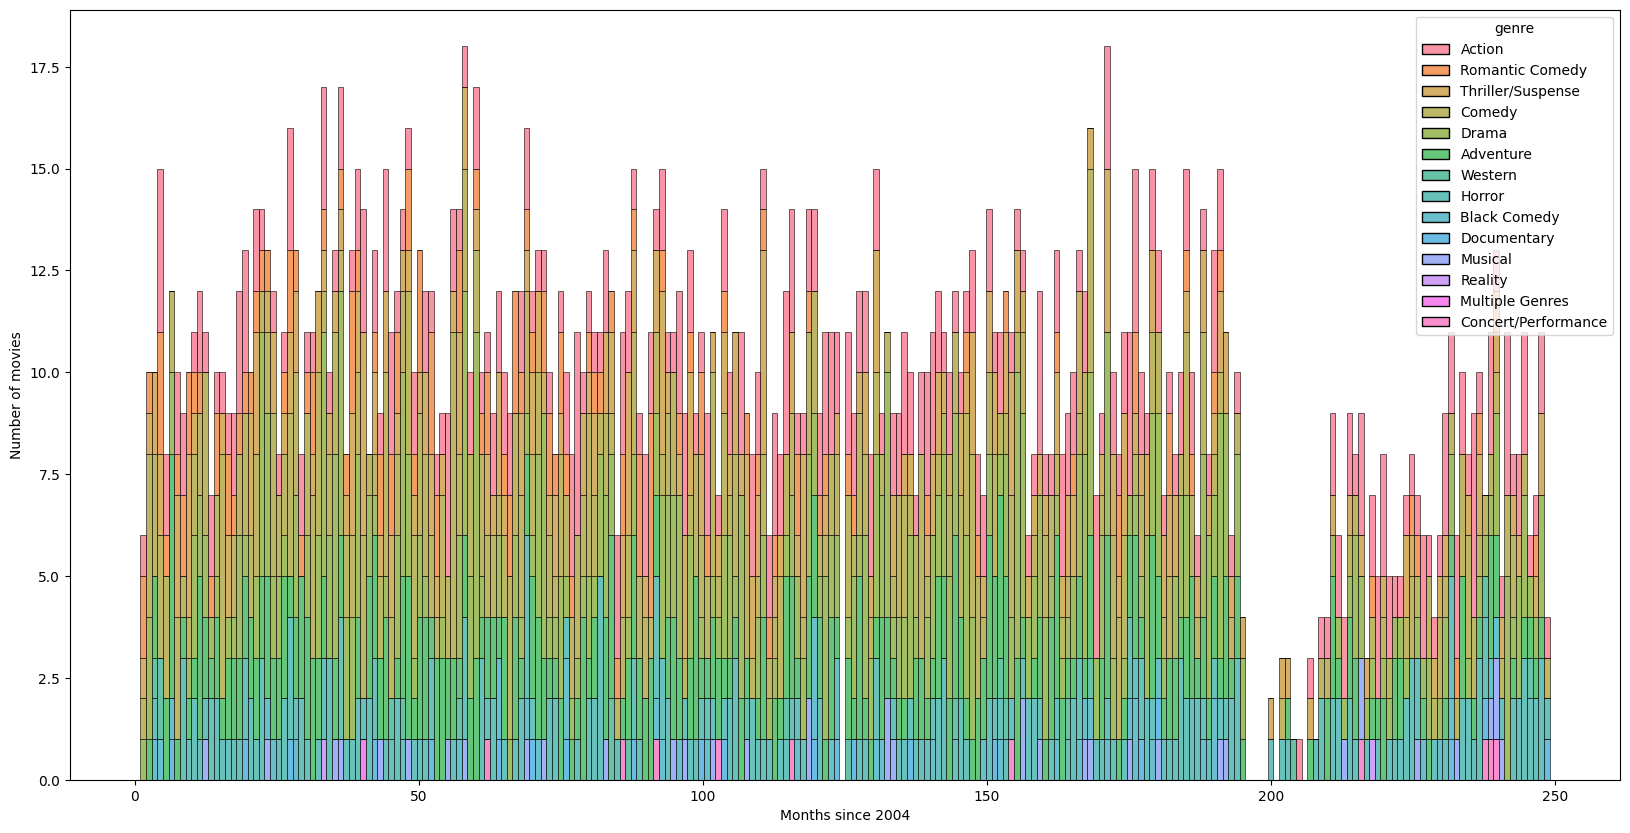

In [12]:
df['release_day'] = pd.to_datetime(df['release_day'], errors='coerce')
df['month'] = df['release_day'].dt.month
df['year'] = df['release_day'].dt.year

min_year = df['year'].min()

df['month_year'] = df['month'] + (df['year'] - min_year) * 12

fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(df, x='month_year', hue='genre', multiple='stack', bins=250)
plt.xlabel('Months since ' + str(min_year))
plt.ylabel('Number of movies')

Text(0, 0.5, 'Number of movies with previews')

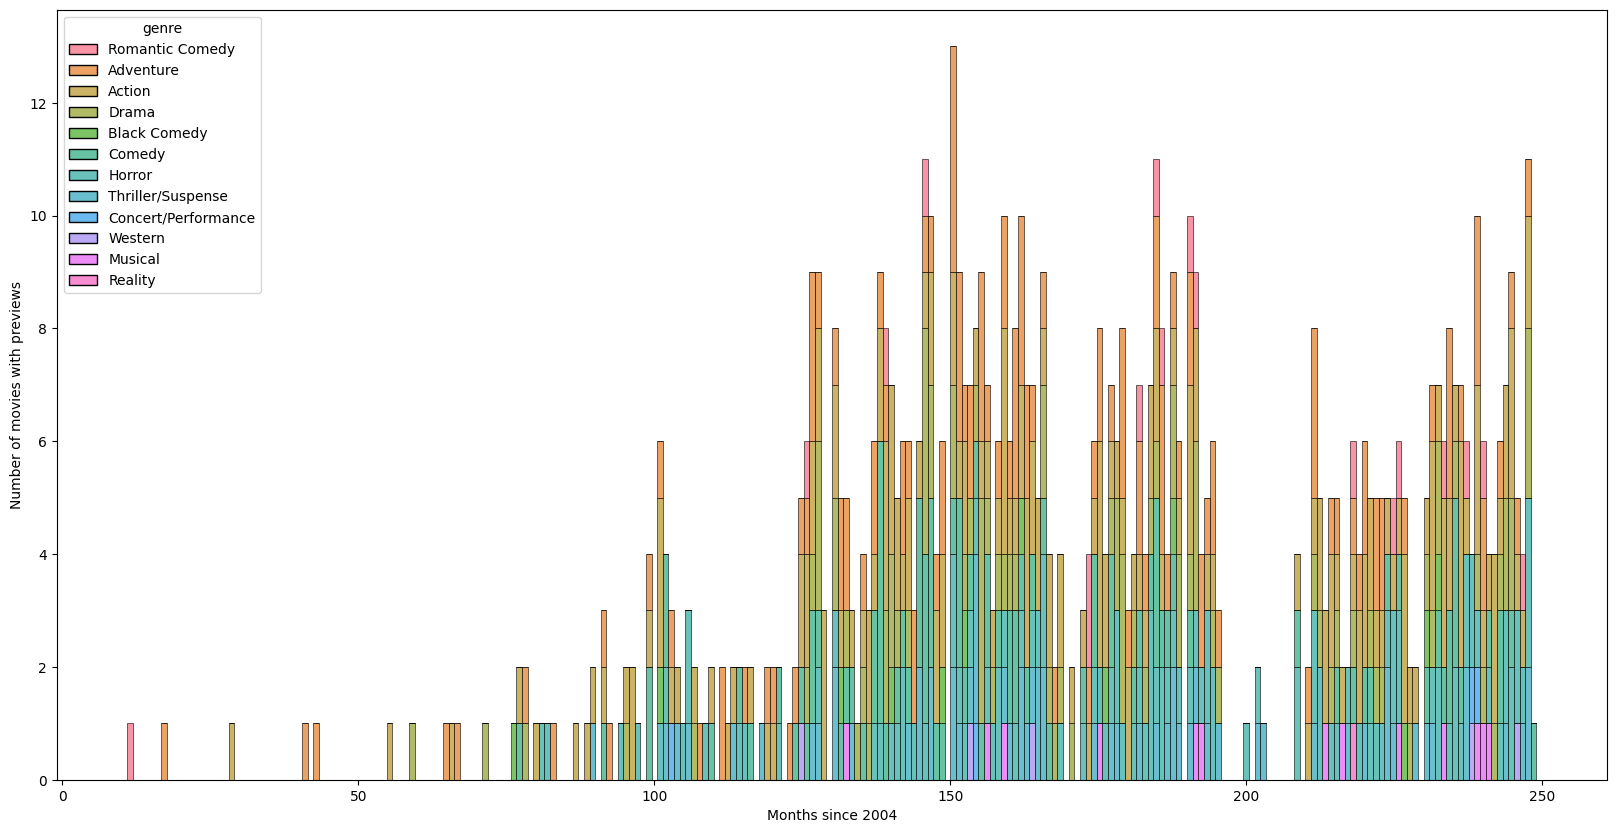

In [14]:
# do the same thing but only with movies that have previews
has_previews = df['preview_sum'] > 0

fig, ax = plt.subplots(figsize=(20, 10))

sns.histplot(df[has_previews], x='month_year', hue='genre', multiple='stack', bins=250)
plt.xlabel('Months since ' + str(min_year))
plt.ylabel('Number of movies with previews')

In [20]:
# print the month and years that have no previews
df_has_previews = df[has_previews]

npdd = df_has_previews.groupby('month_year').size()

print('Months with no previews:')
for i in range(npdd.index.max()):
    if i not in npdd.index:
        print(f'{i % 12 + 1}/{min_year + i // 12}')



Months with no previews:
1/2004
2/2004
3/2004
4/2004
5/2004
6/2004
7/2004
8/2004
9/2004
10/2004
11/2004
1/2005
2/2005
3/2005
4/2005
5/2005
7/2005
8/2005
9/2005
10/2005
11/2005
12/2005
1/2006
2/2006
3/2006
4/2006
5/2006
7/2006
8/2006
9/2006
10/2006
11/2006
12/2006
1/2007
2/2007
3/2007
4/2007
5/2007
7/2007
9/2007
10/2007
11/2007
12/2007
1/2008
2/2008
3/2008
4/2008
5/2008
6/2008
7/2008
9/2008
10/2008
11/2008
1/2009
2/2009
3/2009
4/2009
5/2009
9/2009
10/2009
11/2009
1/2010
2/2010
3/2010
4/2010
8/2010
1/2011
2/2011
3/2011
5/2011
10/2011
3/2012
5/2012
10/2013
3/2014
4/2018
5/2020
6/2020
7/2020
8/2020
10/2020
1/2021
2/2021
3/2021
4/2021
5/2021
